In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

In [141]:
%matplotlib inline

In [142]:
pd.set_option('display.max_columns', None)

In [143]:
df = pd.read_csv('data.csv')

In [144]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

In [145]:
df.drop([' Current Liability to Liability', ' Net Income Flag'], axis = 1, inplace= True)

In [146]:
df.shape

(6819, 94)

# Separating the dataset

In [147]:
X = df.drop(['Bankrupt?'], axis = 1)
y = df['Bankrupt?']

# Selecting features with the Variance Threshold Method

In [148]:
X1 = X.copy()

In [149]:
from sklearn.preprocessing import MinMaxScaler 
transformer = MinMaxScaler().fit(X1)
x_normalized = transformer.transform(X1)
X_norm = pd.DataFrame(x_normalized, columns= X1.columns)


In [150]:
from sklearn.feature_selection import VarianceThreshold

var_threshold = 0.01
sel = VarianceThreshold(threshold=(var_threshold))
sel = sel.fit(X_norm)
temp = sel.transform(X_norm)
VTM_df = pd.DataFrame(temp, columns=sel.get_feature_names_out())
print(X1.shape)
print(VTM_df.shape)

(6819, 93)
(6819, 15)


In [151]:
VTM_df

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Total Asset Growth Rate,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liabilities/Liability,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate
0,1.258227e-14,0.000000e+00,7.323965e-13,0.000000,0.498498,0.086957,1.822749e-14,1.166173e-14,0.166673,0.190643,0.004094,0.676269,7.010000e-02,6.550000e-01,4.580000e-02
1,2.900751e-14,0.000000e+00,6.536007e-13,0.000000,0.611612,0.064468,9.369369e-01,7.197197e-02,0.127236,0.182419,0.014948,0.308589,1.065198e-14,7.700000e-01,2.490000e-01
2,2.363661e-14,2.555110e-03,7.980596e-13,0.000000,0.728729,0.014993,6.506507e-03,2.652653e-01,0.340201,0.602806,0.000991,0.446027,1.791094e-13,1.022676e-13,7.610000e-02
3,1.079968e-14,0.000000e+00,4.535807e-13,0.000000,0.488488,0.089955,7.137137e-01,9.159159e-01,0.161575,0.225815,0.018851,0.615848,8.140000e-01,6.050000e-01,2.030000e-01
4,7.897898e-01,0.000000e+00,6.929986e-13,0.000000,0.551552,0.175412,1.635310e-14,2.938149e-14,0.260330,0.358380,0.014161,0.975007,6.680000e-01,5.050000e-01,8.240000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,1.511724e-14,4.509018e-01,1.808262e-13,0.113372,0.707708,0.103448,4.034034e-03,1.431212e-14,0.312840,0.578455,0.099481,0.786888,2.294154e-14,1.244230e-14,1.077940e-14
6815,5.225225e-01,1.442886e-01,2.394179e-13,0.371596,0.522523,0.103448,9.949950e-01,6.058040e-14,0.335085,0.444043,0.080337,0.849898,1.517299e-14,1.173396e-14,7.710000e-01
6816,2.511824e-14,1.041169e-14,0.000000e+00,0.490839,0.599600,0.106447,2.800109e-14,1.025323e-13,0.476747,0.496053,0.412885,0.553964,1.762272e-14,1.749713e-14,4.074263e-14
6817,1.237392e-14,2.515030e-01,2.131526e-13,0.181294,0.725726,0.109445,4.554555e-01,2.332345e-14,0.353624,0.564439,0.112238,0.893241,2.135940e-14,1.351937e-14,1.165392e-14


# Singular Value Decomposition on the variables selected by the variance threshold

scaler = StandardScaler()
scaler.fit(VTM_df)
scaler.transform(VTM_df)
X_SVD = pd.DataFrame(scaler.transform(VTM_df), columns=VTM_df.columns)

pca = PCA(random_state=5)
pca.fit(VTM_df)

print(pca.explained_variance_ratio_)

X_pca = pd.DataFrame(pca.transform(VTM_df)).iloc[:,0:10]

plt.rcParams['figure.figsize'] = [15, 10]

PC_values = np.arange(pca.n_components_) +1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

variance_acc_temp = pd.Series(pca.explained_variance_ratio_.cumsum()) 
print (variance_acc_temp)

plt.bar(range(len(variance_acc_temp)), variance_acc_temp, color='royalblue' )
plt.grid(color='#95a5a6', linestyle='--', linewidth=0.2, axis='y' )
plt.xticks(range(len(variance_acc_temp)))
plt.xlabel('PCA')
plt.ylabel('Expl_var_ratio_accum')
plt.title('Accummulated explained variance ratio')
plt.rcParams['figure.figsize'] = [15, 10]


plt.show()

coefficients= pd.DataFrame(pca.components_)

coefficients

PCA0 = b00 * col0 + b01 * col1 + ....+ b085 * col95
eigen_vector1 = (b00, b01, b02,...)
eigen_value = vancianza


# Balancing the dataset: upsampling and downsampling

In [152]:
df_1 = pd.concat([VTM_df, y], axis=1)


In [153]:
y = df_1['Bankrupt?'].astype('int')
X = df_1.drop(['Bankrupt?'], axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 17)

In [155]:
TRAIN = pd.concat([X_train, y_train], axis=1)
TRAIN.shape

(5455, 16)

In [156]:
(TRAIN[TRAIN["Bankrupt?"]==1])

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Total Asset Growth Rate,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liabilities/Liability,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Bankrupt?
1868,3.683236e-14,5.020040e-01,3.525605e-13,0.558761,0.738739,0.088456,1.429509e-13,1.204035e-14,0.474841,0.459619,0.100335,0.919886,2.165894e-14,2.304338e-14,1.292516e-14,1
3,1.079968e-14,0.000000e+00,4.535807e-13,0.000000,0.488488,0.089955,7.137137e-01,9.159159e-01,0.161575,0.225815,0.018851,0.615848,8.140000e-01,6.050000e-01,2.030000e-01,1
6641,5.535536e-01,0.000000e+00,2.788158e-13,0.000000,0.025726,0.244378,1.903080e-14,9.730727e-14,0.465562,0.739236,0.108758,0.858173,7.290000e-01,4.620000e-02,3.330000e-01,1
233,1.033668e-14,0.000000e+00,7.465393e-13,0.000000,0.746747,0.041979,7.917918e-01,3.253253e-01,0.077033,0.138243,0.011382,0.375513,1.394958e-14,8.040000e-01,3.140000e-01,1
1445,9.869870e-01,3.246493e-01,7.889678e-13,0.000000,0.546547,0.094453,5.695696e-01,5.641550e-14,0.311743,0.483895,0.050565,0.815745,1.877357e-14,1.225404e-14,5.420000e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,2.199293e-14,0.000000e+00,7.142128e-13,0.000000,0.467467,0.077961,1.576018e-14,7.117117e-01,0.106695,0.156383,0.000409,0.517257,6.230000e-01,4.450000e-01,5.020000e-03,1
1,2.900751e-14,0.000000e+00,6.536007e-13,0.000000,0.611612,0.064468,9.369369e-01,7.197197e-02,0.127236,0.182419,0.014948,0.308589,1.065198e-14,7.700000e-01,2.490000e-01,1
948,2.651884e-14,1.090505e-14,3.505401e-13,0.000000,0.729730,0.112444,4.724725e-01,2.832134e-14,0.463405,0.663927,0.047491,0.909853,2.485980e-14,1.758731e-14,4.840000e-01,1
2908,2.681980e-14,1.002004e-01,4.586317e-13,0.000000,0.526527,0.151424,1.256606e-14,2.347491e-14,0.292874,0.413661,0.060502,0.859651,9.170000e-01,6.670000e-01,3.980000e-01,1


## Upsampling the minority class

In [157]:
upsample_indexes = np.random.choice(TRAIN[TRAIN["Bankrupt?"]==1].index, size = 400, replace=True).tolist()

In [158]:
upsample = TRAIN.loc[upsample_indexes,:]
upsample

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Total Asset Growth Rate,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liabilities/Liability,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Bankrupt?
2343,2.872873e-01,0.000000,2.778056e-13,0.0,0.690691,0.163418,5.645646e-01,1.551616e-13,0.444877,0.835713,0.159119,0.812853,2.065052e-14,1.095755e-14,1.085628e-14,1
379,3.828043e-13,0.000000,3.677135e-13,0.0,0.572573,0.000000,1.911912e-03,7.567568e-03,0.040601,0.383260,0.006327,0.817652,4.034769e-12,4.963875e-13,1.697453e-13,1
1444,1.289480e-14,0.046994,7.606821e-13,0.0,0.477477,0.074963,6.466466e-01,2.355063e-14,0.382824,0.529054,0.008005,0.802587,2.479441e-14,1.823266e-14,1.020000e-01,1
1442,1.026722e-14,0.000000,6.536007e-13,0.0,0.724725,0.112444,1.975760e-14,9.469469e-01,0.263209,0.317587,0.004370,0.589994,1.119844e-14,9.660000e-01,4.440000e-03,1
1758,5.535536e-01,0.088477,3.343769e-13,0.0,0.062863,0.242879,1.442133e-14,4.036169e-13,0.621736,0.750831,0.091382,0.898107,1.141227e-14,9.790000e-01,4.040000e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,2.236333e-14,0.993988,5.394479e-13,0.0,0.418418,0.076462,3.691401e-14,1.446357e-14,0.127973,0.144971,0.029817,0.768011,5.510000e-01,5.300000e-01,3.570000e-01,1
1949,6.987963e-14,0.000000,1.818182e-01,0.0,0.374374,0.451274,1.639709e-13,2.788213e-13,0.377485,0.387679,0.285880,0.988964,1.420000e-01,1.900000e-02,5.520000e-01,1
2343,2.872873e-01,0.000000,2.778056e-13,0.0,0.690691,0.163418,5.645646e-01,1.551616e-13,0.444877,0.835713,0.159119,0.812853,2.065052e-14,1.095755e-14,1.085628e-14,1
5500,9.629630e-01,0.000000,4.616623e-13,0.0,0.629630,0.094453,1.139935e-14,1.711396e-14,0.336912,0.433155,0.017511,0.683642,1.787601e-14,1.423781e-14,2.000000e-03,1


## Clustering to downsize the majority class

In [159]:
No_bankrupcies =  TRAIN[(TRAIN['Bankrupt?'] == 0)]

In [160]:
kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(No_bankrupcies)

KMeans(n_clusters=7, random_state=1)

In [161]:
clusters = kmeans.predict(No_bankrupcies)

elem_in_cluster = pd.Series(clusters).value_counts().sort_index() # Number of values in each cluster
elem_in_cluster

0     648
1     725
2    1178
3     609
4     752
5     661
6     706
dtype: int64

In [162]:
clusters_weight = []
for j in range(len(elem_in_cluster)):
    weight = elem_in_cluster[j]/len(No_bankrupcies)
    clusters_weight.append(weight)

In [163]:
No_bankrupcies["cluster"] = clusters
No_bankrupcies

C:\Users\31612\AppData\Local\Temp\ipykernel_3536\3635058938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No_bankrupcies["cluster"] = clusters


,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Total Asset Growth Rate,Total Asset Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Current Liabilities/Liability,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Bankrupt?,cluster
2542,1.353144e-14,0.000000e+00,7.717944e-13,0.186355,0.066466,0.335832,2.050736e-13,4.482950e-14,0.171034,0.184907,0.019934,0.603629,9.140000e-03,1.290000e-01,6.540000e-02,0,2
1809,3.580217e-14,3.363384e-14,0.000000e+00,0.000000,0.720721,0.085457,1.001001e-10,2.067306e-14,0.787858,0.754803,0.131380,0.806740,3.752457e-14,3.989659e-14,1.746463e-14,0,2
4322,1.103119e-14,5.941884e-02,3.778156e-13,0.118129,0.596597,0.340330,1.625747e-14,9.289247e-13,0.563323,0.744841,0.164218,0.929519,7.470000e-01,5.870000e-01,5.090000e-01,0,4
3933,8.469592e-14,5.284102e-14,1.220324e-12,0.306610,0.669670,0.028486,1.911912e-03,1.219181e-14,0.409265,0.392087,0.221474,0.615800,5.703645e-14,6.032370e-14,8.428286e-14,0,2
1784,2.408804e-14,2.615230e-01,6.293559e-13,0.216115,0.672673,0.206897,8.258258e-01,2.896500e-13,0.623509,0.824909,0.081422,0.920141,1.556919e-14,1.202105e-14,4.340000e-01,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4.324324e-01,1.022044e-02,3.616523e-13,0.189898,0.955956,0.151424,1.078731e-14,6.421522e-14,0.298744,0.463892,0.036543,0.758802,1.355168e-14,8.850000e-01,3.030000e-01,0,1
406,1.503622e-14,5.320641e-01,1.505201e-13,0.000000,0.667668,0.058471,2.201452e-14,1.014722e-14,0.223893,0.241770,0.041121,0.581476,1.663976e-14,1.595049e-14,7.780000e-01,0,0
5510,5.605606e-02,8.847695e-02,2.283057e-13,0.260350,0.669670,0.122939,1.434482e-14,2.279338e-14,0.317485,0.417248,0.009554,0.648311,1.312155e-14,1.026691e-14,8.550000e-02,0,2
2191,6.136136e-02,1.583166e-01,4.293359e-13,0.220873,0.741742,0.347826,3.004762e-14,1.119223e-13,0.740799,0.823791,0.164228,0.849657,9.050000e-03,8.570000e-01,5.420000e-01,0,1


In [164]:
new_No_bankrupcies = pd.DataFrame(columns=No_bankrupcies.columns, dtype=float)
 
for cluster, weight in enumerate(clusters_weight):
    new_No_bankrupcies = pd.concat([new_No_bankrupcies, No_bankrupcies[No_bankrupcies["cluster"]==cluster].sample(round(400*weight))], axis=0)
    
new_No_bankrupcies.drop(columns=['cluster'], inplace=True)

In [165]:
final1_df = pd.concat([new_No_bankrupcies, upsample], axis=0)
final1_df = final1_df.sort_index()

In [166]:
final1_df.shape

(799, 16)

In [167]:
y_train = final1_df['Bankrupt?'].astype('int')
X_train = final1_df.drop(['Bankrupt?'], axis=1)

# Predicting with KNN

In [169]:
# entrenar distintos modelos con distintos valores de k
K = range(2, 14, 3)
accuracies = []
models = []

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    models.append(knn)
    ypred_train = knn.predict(X_train)
    accuracies.append(accuracy_score(y_train, ypred_train))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(k, accuracy_score(y_train, ypred_train)))
    print("The kappa of the model n_neighbors={} is: {:.2f}".format(k, cohen_kappa_score(y_train, ypred_train)))

The accuracy of the model n_neighbors=2 is: 0.97
The kappa of the model n_neighbors=2 is: 0.94
The accuracy of the model n_neighbors=5 is: 0.83
The kappa of the model n_neighbors=5 is: 0.67
The accuracy of the model n_neighbors=8 is: 0.80
The kappa of the model n_neighbors=8 is: 0.59
The accuracy of the model n_neighbors=11 is: 0.76
The kappa of the model n_neighbors=11 is: 0.52


import pickle

pickel.dump(models[0], 

In [177]:
K = range(2, 14, 3)
#accuracies = []

for i in range(len(models)):
    #knn = KNeighborsClassifier(n_neighbors=k) 
    knn = models[i]
    ypred_test = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, ypred_test))
    print("The accuracy of the model n_neighbors={} is: {:.2f}".format(list(K)[i], accuracy_score(y_test, ypred_test)))
    print("The kappa score of the model n_neighbors={} is: {:.2f}".format(list(K)[i],cohen_kappa_score(y_test, ypred_test)))

The accuracy of the model n_neighbors=2 is: 0.77
The kappa score of the model n_neighbors=2 is: 0.05
The accuracy of the model n_neighbors=5 is: 0.63
The kappa score of the model n_neighbors=5 is: 0.06
The accuracy of the model n_neighbors=8 is: 0.70
The kappa score of the model n_neighbors=8 is: 0.08
The accuracy of the model n_neighbors=11 is: 0.61
The kappa score of the model n_neighbors=11 is: 0.05


In [178]:
knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(X_train, y_train)
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)
display(y.value_counts())


0    6599
1     220
Name: Bankrupt?, dtype: int64

In [180]:
display(confusion_matrix(ypred_train, y_train))

array([[399,  25],
       [  0, 375]], dtype=int64)

In [181]:
display(confusion_matrix(ypred_test, y_test))

array([[1037,   26],
       [ 283,   18]], dtype=int64)

## Feature Extraction-SHAP

In [213]:
explainer = shap.TreeExplainer(knn)
shap_values = explainer.shap_values(X)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>

In [ ]:
shap.dependence_plot(' Tax rate (A)', shap_values, X)

In [ ]:
shap.summary_plot(shap_values, X)

# Random Forest

In [183]:
clf = RandomForestClassifier(max_depth=4,
                             min_samples_split=6,
                             min_samples_leaf =3,
                             max_samples=0.8, random_state=8)
                            
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.87
The accuracy for the Random Forest in the TEST set is 0.77


1    448
0    351
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[323,  76],
       [ 28, 372]], dtype=int64)

0.739635032837018

0    1021
1     343
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1017,  303],
       [   4,   40]], dtype=int64)

0.15860666607726992

In [184]:
##### from sklearn.model_selection import GridSearchCV

max_depth_choices= [2, 3, 5,7,9] 
min_samples_split_choices = [2,4,6,8,9]  
min_samples_leaf_choices = [1,3] 
max_samples=[0.8,0.5]
#n_jobs = [-1]

grid = {'max_depth': max_depth_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'max_samples':max_samples}

model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5) 
grid_search.fit(X_train, y_train)
grid_search.best_score_

0.768561320754717

In [185]:
grid_search.best_params_

{'max_depth': 3,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [186]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state =8)
                          
clf.fit(X_train, y_train)

print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The accuracy for the Random Forest in the TEST set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_train)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = clf.predict(X_test)
display(pd.DataFrame(y_pred).value_counts())
display(y.value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the Random Forest in the TRAIN set is 0.83
The accuracy for the Random Forest in the TEST set is 0.77


1    432
0    367
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[317,  82],
       [ 50, 350]], dtype=int64)

0.6695533386805694

0    1015
1     349
dtype: int64

0    6599
1     220
Name: Bankrupt?, dtype: int64

array([[1010,  310],
       [   5,   39]], dtype=int64)

0.14976055724858517

## Feature Extraction-SHAP

In [211]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X)

In [ ]:
shap.dependence_plot(' Tax rate (A)', shap_values, X)

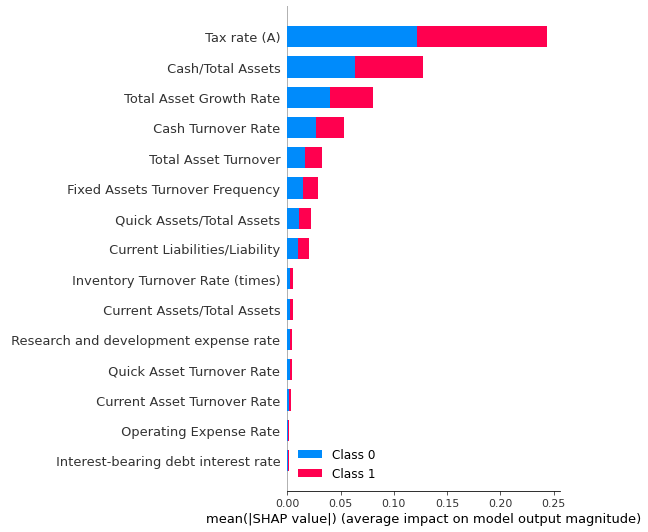

In [212]:
shap.summary_plot(shap_values, X)

# XGBoost

In [187]:
import xgboost as xgb

In [188]:
xgb_cl = xgb.XGBClassifier()

In [189]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [190]:
print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(xgb_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(xgb_cl.score(X_test, y_test)))

y_pred = pd.Series(xgb_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(xgb_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))

The accuracy for the XGB in the TRAIN set is 1.00
The accuracy for the XGB in the TEST set is 0.85


1    400
0    399
dtype: int64

array([[399,   0],
       [  0, 400]], dtype=int64)

1.0

0    1134
1     230
dtype: int64

array([[1122,  198],
       [  12,   32]], dtype=int64)

0.18969380134428682

Learning_rate: also called eta, it specifies how quickly the model fits the residual errors by using additional base learners.typical values: 0.01–0.2

Gamma, reg_alpha, reg_lambda: these 3 parameters specify the values for 3 types of regularization done by XGBoost - minimum loss reduction to create a new split, L1 reg on leaf weights, L2 reg leaf weights respectively.Typical values for gamma: 0 - 0.5 but highly dependent on the data. Typical values for reg_alpha and reg_lambda: 0 - 1 is a good starting point but again, depends on the data.

Max_depth - how deep the tree's decision nodes can go. Must be a positive integer. typical values: 1–10

Subsample - fraction of the training set that can be used to train each tree. If this value is low, it may lead to underfitting or if it is too high, it may lead to overfitting. typical values: 0.5–0.9

Colsample_bytree- fraction of the features that can be used to train each tree. A large value means almost all features can be used to build the decision tree. typical values: 0.5–0.9

The above are the main hyperparameters people often tune. It is perfectly OK if you don’t understand them all completely (like me) but you can refer to this post which gives a thorough overview of how each of the above parameters works and how to tune them.



In [191]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.01, 0.2],
    "gamma": [0, 0.5, 1],
    "reg_lambda": [0, 0.5, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "reg_alpha": [0, 0.5, 1, 10]
}

In [192]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [193]:
grid_cv.best_score_


0.8821899041172676

In [194]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.5,
 'learning_rate': 0.2,
 'max_depth': 5,
 'reg_alpha': 10,
 'reg_lambda': 10,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [198]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")
_ = final_cl.fit(X_train, y_train)
preds = final_cl.predict(X_test)

print("The accuracy for the XGB in the TRAIN set is {:.2f}".format(final_cl.score(X_train, y_train)))
print("The accuracy for the XGB in the TEST set is {:.2f}".format(final_cl.score(X_test, y_test)))

y_pred = pd.Series(final_cl.predict(X_train))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_train, y_pred))
display(cohen_kappa_score(y_train, y_pred))

y_pred = pd.Series(final_cl.predict(X_test))
display(pd.DataFrame(y_pred).value_counts())
display(confusion_matrix(y_test, y_pred))
display(cohen_kappa_score(y_test, y_pred))


The accuracy for the XGB in the TRAIN set is 0.92
The accuracy for the XGB in the TEST set is 0.80


1    425
0    374
dtype: int64

array([[353,  46],
       [ 21, 379]], dtype=int64)

0.8322769640479362

0    1060
1     304
dtype: int64

array([[1052,  268],
       [   8,   36]], dtype=int64)

0.15952848722986246

## Feature extraction-SHAP

In [200]:
explainer = shap.TreeExplainer(final_cl)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [203]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

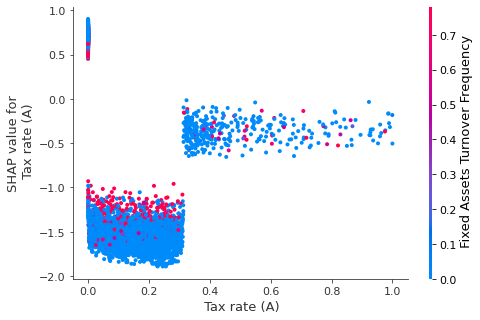

In [208]:
shap.dependence_plot(' Tax rate (A)', shap_values, X)

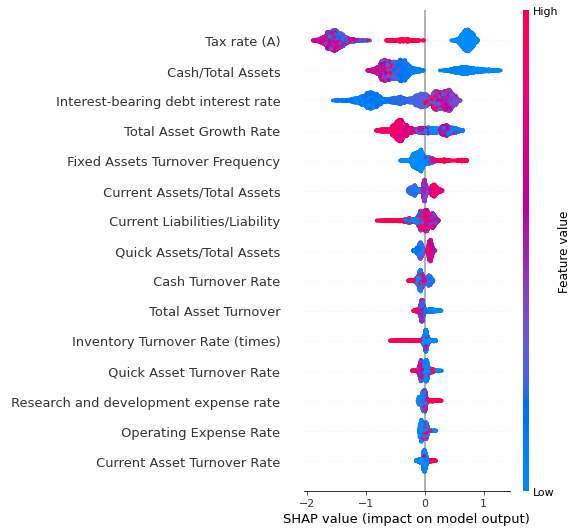

In [206]:
shap.summary_plot(shap_values, X)

# K-fold Cross validation

In [110]:
a = np.zeros(shape=(4, 12))

pd.DataFrame(a)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Aplicamos CV-10 a todos los modelos para tner una mejor estimacion del accuracy y menor varianza
nfolds = 10
models = [m1= knn, m2= clf, m3= xgb_cl]
cv_scores = np.zeros((len(models), nfolds))

for i, model in enumerate(models):
    scores = cross_val_score(model, X todos, y todos, scoring='roc', cv=nfolds)
    cv_scores[i] = scores
    
cv_df = pd.DataFrame(cv_scores, index=['m1', 'm2', 'm3'])
cv_df['mean_score'] = cv_df.mean(1)
cv_df['std_score'] = cv_df.std(1)

SyntaxError: invalid syntax (3028902073.py, line 3)